In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import metrics
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
%matplotlib inline

In [10]:
from google.colab import files
files.upload()

Saving bank-additional-full.csv to bank-additional-full.csv


{'bank-additional-full.csv': b'"age";"job";"marital";"education";"default";"housing";"loan";"contact";"month";"day_of_week";"duration";"campaign";"pdays";"previous";"poutcome";"emp.var.rate";"cons.price.idx";"cons.conf.idx";"euribor3m";"nr.employed";"y"\r\n56;"housemaid";"married";"basic.4y";"no";"no";"no";"telephone";"may";"mon";261;1;999;0;"nonexistent";1.1;93.994;-36.4;4.857;5191;"no"\r\n57;"services";"married";"high.school";"unknown";"no";"no";"telephone";"may";"mon";149;1;999;0;"nonexistent";1.1;93.994;-36.4;4.857;5191;"no"\r\n37;"services";"married";"high.school";"no";"yes";"no";"telephone";"may";"mon";226;1;999;0;"nonexistent";1.1;93.994;-36.4;4.857;5191;"no"\r\n40;"admin.";"married";"basic.6y";"no";"no";"no";"telephone";"may";"mon";151;1;999;0;"nonexistent";1.1;93.994;-36.4;4.857;5191;"no"\r\n56;"services";"married";"high.school";"no";"no";"yes";"telephone";"may";"mon";307;1;999;0;"nonexistent";1.1;93.994;-36.4;4.857;5191;"no"\r\n45;"services";"married";"basic.9y";"unknown";"no

In [0]:
df = pd.read_csv('bank-additional-full.csv', delimiter = ';')

In [0]:
df.dropna(inplace=True)

In [140]:
df.head()

age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon ...         1    999         0  nonexistent          1.1   
1   may         mon ...         1    999         0  nonexistent          1.1   
2   may         mon ...         1    999         0  nonexistent          1.1   
3   may         mon ...         1    999         0  nonexistent          1.1   
4   may         mon ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y  
0          93.994          -36.4      4.857       5191.0  no  
1          93.994          -36.4      4.857       5191.0  no  
2          93.994          -36.4      4.857       5191.0  no  
3          93.994          -36.4      4.857       5191.0  no  
4          93.994          -36.4      4.857       5191.0  no  

[5 rows x 21 columns]

In [0]:
df['y'] = df['y'].map({'yes': 1, 'no': 0})

In [142]:
df.groupby('y').size() # The dataset is skewed  towards '0' class

y
0    36548
1     4640
dtype: int64

In [0]:
def sampling_elements(group, k=4000):
    if len(group) < k:
        return group
    return group.sample(k)

balanced = df.groupby('y').apply(sampling_elements).reset_index(drop=True)

In [144]:
balanced.groupby('y').size() # dataset is balanced now

y
0    4000
1    4000
dtype: int64

In [0]:
balanced = balanced.sample(frac=1).reset_index(drop=True)

In [146]:
balanced.head()

age          job  marital            education  default housing loan  \
0   36       admin.   single    university.degree       no      no  yes   
1   24  blue-collar   single             basic.4y       no      no   no   
2   46   technician  married  professional.course       no     yes   no   
3   58  blue-collar  married             basic.4y       no     yes   no   
4   51   management  married          high.school  unknown     yes   no   

     contact month day_of_week ...  campaign  pdays  previous     poutcome  \
0   cellular   nov         tue ...         1    999         0  nonexistent   
1  telephone   jun         wed ...         1    999         0  nonexistent   
2   cellular   apr         thu ...         2    999         0  nonexistent   
3   cellular   aug         wed ...         1      3         1      success   
4   cellular   may         tue ...         1    999         0  nonexistent   

  emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  nr.employed  y  
0         -3.4          92.649          -30.1      0.720       5017.5  1  
1          1.4          94.465          -41.8      4.962       5228.1  1  
2         -1.8          93.075          -47.1      1.365       5099.1  1  
3         -1.7          94.027          -38.3      0.900       4991.6  1  
4         -1.8          92.893          -46.2      1.344       5099.1  0  

[5 rows x 21 columns]

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:482: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data[hue_mask])


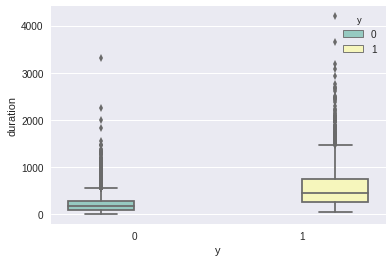

In [235]:
ax = sns.boxplot(x="y", y="duration",hue="y", data=balanced, palette="Set3") # box plot to identify features which give positive outcome

In [0]:
balanced = pd.concat([balanced,pd.get_dummies(balanced['job'], prefix='job',dummy_na=True)],axis=1).drop(['job'],axis=1)# one hot encoding for job column
balanced = pd.concat([balanced,pd.get_dummies(balanced['marital'], prefix='marital',dummy_na=True)],axis=1).drop(['marital'],axis=1)# one hot encoding for marital column
balanced = pd.concat([balanced,pd.get_dummies(balanced['education'], prefix='education',dummy_na=True)],axis=1).drop(['education'],axis=1)# one hot encoding for marital column
balanced = pd.concat([balanced,pd.get_dummies(balanced['default'], prefix='default',dummy_na=True)],axis=1).drop(['default'],axis=1)# one hot encoding for education column
balanced = pd.concat([balanced,pd.get_dummies(balanced['housing'], prefix='housing',dummy_na=True)],axis=1).drop(['housing'],axis=1)# one hot encoding for housing column
balanced = pd.concat([balanced,pd.get_dummies(balanced['loan'], prefix='loan',dummy_na=True)],axis=1).drop(['loan'],axis=1)# one hot encoding for loan column
balanced = pd.concat([balanced,pd.get_dummies(balanced['contact'], prefix='contact',dummy_na=True)],axis=1).drop(['contact'],axis=1)# one hot encoding for contact column
balanced = pd.concat([balanced,pd.get_dummies(balanced['month'], prefix='month',dummy_na=True)],axis=1).drop(['month'],axis=1)# one hot encoding for month column
balanced = pd.concat([balanced,pd.get_dummies(balanced['day_of_week'], prefix='day_of_week',dummy_na=True)],axis=1).drop(['day_of_week'],axis=1)# one hot encoding for month column
balanced = pd.concat([balanced,pd.get_dummies(balanced['poutcome'], prefix='poutcome',dummy_na=True)],axis=1).drop(['poutcome'],axis=1)# one hot encoding for poutcome column

In [148]:
balanced.columns

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'job_nan', 'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'marital_nan', 'education_basic.4y',
       'education_basic.6y', 'education_basic.9y', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'education_unknown', 'education_nan',
       'default_no', 'default_unknown', 'default_nan', 'housing_no',
       'housing_unknown', 'housing_yes', 'housing_nan', 'loan_no',
       'loan_unknown', 'loan_yes', 'loan_nan', 'contact_cellular',
       'contact_telephone', 'contact_nan', 'month_apr', 'month_aug

In [0]:
balanced.drop(['job_unknown','job_nan','marital_unknown','marital_nan','default_unknown','default_nan','housing_unknown','housing_nan','loan_unknown','loan_nan','contact_nan','month_nan','day_of_week_nan','poutcome_nonexistent','poutcome_nan'], inplace=True, axis=1)
#droppinf nan values 

In [150]:
len(balanced.columns)

58

In [0]:
df_new = balanced[[c for c in balanced if c not in ['y']] + ['y']]

In [152]:
df_new.corr()

age  duration  campaign     pdays  \
age                            1.000000 -0.015281 -0.015134 -0.071948   
duration                      -0.015281  1.000000 -0.035390  0.025875   
campaign                      -0.015134 -0.035390  1.000000  0.089029   
pdays                         -0.071948  0.025875  0.089029  1.000000   
previous                       0.075174 -0.038967 -0.100124 -0.713602   
emp.var.rate                  -0.048574  0.069518  0.201596  0.336484   
cons.price.idx                -0.016510  0.055110  0.140811  0.031480   
cons.conf.idx                  0.135103 -0.062256 -0.027199 -0.153871   
euribor3m                     -0.045228  0.055471  0.190295  0.391205   
nr.employed                   -0.074956  0.060865  0.188882  0.477897   
job_admin.                    -0.122165 -0.002418  0.016933 -0.039215   
job_blue-collar               -0.043892  0.029755  0.027967  0.108492   
job_entrepreneur               0.020643  0.012590  0.001971  0.032909   
job_housemaid                  0.113743 -0.015033 -0.016612 -0.009901   
job_management                 0.054273 -0.011941 -0.011140  0.007049   
job_retired                    0.558310 -0.012146 -0.039047 -0.097656   
job_self-employed             -0.017999  0.014464  0.004366  0.035910   
job_services                  -0.066652  0.002343  0.023977  0.040920   
job_student                   -0.257134 -0.016926 -0.037267 -0.108808   
job_technician                -0.078592 -0.002084 -0.004478  0.003169   
job_unemployed                -0.016262 -0.019549 -0.022527 -0.033238   
marital_divorced               0.187941 -0.007894  0.005706  0.006429   
marital_married                0.311983  0.006394  0.011272  0.033009   
marital_single                -0.457509 -0.003275 -0.017489 -0.039484   
education_basic.4y             0.317999 -0.000506  0.008551 -0.005398   
education_basic.6y            -0.006728  0.034327  0.000495  0.045888   
education_basic.9y            -0.047595  0.011456  0.007772  0.071605   
education_high.school         -0.106430  0.009168  0.004511  0.006051   
education_illiterate           0.021073  0.009878 -0.006110 -0.004934   
education_professional.course -0.006129 -0.011163 -0.016680 -0.020322   
education_university.degree   -0.095692 -0.018358 -0.010521 -0.041819   
education_unknown              0.061833 -0.013140  0.016297 -0.037257   
education_nan                       NaN       NaN       NaN       NaN   
default_no                    -0.117639 -0.001811 -0.062001 -0.124655   
housing_no                    -0.014387  0.020911  0.006259  0.009573   
housing_yes                    0.014143 -0.019743 -0.002609 -0.007793   
loan_no                       -0.000064 -0.011456  0.006557  0.020775   
loan_yes                      -0.000180  0.013637 -0.001912 -0.019610   
contact_cellular               0.010526  0.019028 -0.108679 -0.160539   
contact_telephone             -0.010526 -0.019028  0.108679  0.160539   
month_apr                      0.029208  0.010657 -0.063454  0.016488   
month_aug                      0.060171 -0.021021  0.017617 -0.013431   
month_dec                      0.067204  0.012854 -0.014647 -0.076352   
month_jul                     -0.042007  0.066969  0.125880  0.070660   
month_jun                     -0.039881 -0.001390  0.057533  0.021525   
month_mar                      0.002745 -0.042406 -0.031577 -0.064448   
month_may                     -0.067942  0.003989 -0.005291  0.113217   
month_nov                      0.024723 -0.014666 -0.073157 -0.021473   
month_oct                      0.036797 -0.031868 -0.069927 -0.130208   
month_sep                      0.041366 -0.025348 -0.047930 -0.175162   
day_of_week_fri               -0.001815 -0.005178  0.023037  0.018208   
day_of_week_mon                0.006943 -0.029635  0.029900  0.015924   
day_of_week_thu               -0.025411  0.021853  0.004766 -0.025040   
day_of_week_tue                0.026278 -0.002340 -0.029880 -0.013072   
day_of_week_wed      

In [0]:
from sklearn.ensemble import ExtraTreesClassifier

In [249]:
model = ExtraTreesClassifier()
model.fit(X_train1, y_train1)
print(model.feature_importances)

[0.0524582  0.23354647 0.03936603 0.02217293 0.01185451 0.04755934
 0.01765795 0.02031064 0.06974952 0.05824258 0.01427898 0.01082865
 0.00439962 0.00262063 0.00779104 0.00811223 0.00478765 0.0068667
 0.00534481 0.01219291 0.00301323 0.00761169 0.01386172 0.01382664
 0.00691825 0.00639879 0.00884354 0.01129555 0.00025762 0.00930214
 0.01313399 0.00779058 0.         0.01739497 0.01510697 0.0137069
 0.01101085 0.01036654 0.01426496 0.0205001  0.00481886 0.00442705
 0.0010653  0.00398333 0.00573026 0.00448768 0.01452571 0.00276536
 0.00645384 0.00192299 0.01332529 0.01426996 0.01382651 0.01221287
 0.01353555 0.00852999 0.01937307]


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [253]:
l = []
for i in model.feature_importances_:
  l.append(i)


[0.05245819586538504, 0.2335464651561264, 0.0393660255791521, 0.02217292714841749, 0.011854512285494292, 0.04755933951729914, 0.017657948587546806, 0.020310643596669165, 0.06974952220731095, 0.058242579753768654, 0.014278979906064897, 0.01082865388357318, 0.004399623898938259, 0.002620631173211106, 0.0077910383112332355, 0.008112229906154666, 0.004787645557921859, 0.0068666958179968525, 0.005344805553484827, 0.012192909441043584, 0.003013225269199408, 0.0076116947179090556, 0.013861715473617845, 0.013826638376261588, 0.00691825283119442, 0.006398794884135073, 0.008843540763576952, 0.011295546795197222, 0.0002576203671933254, 0.009302135129382527, 0.013133989375808747, 0.007790576622519527, 0.0, 0.01739497475113424, 0.015106968760896533, 0.01370689609758576, 0.011010845249928264, 0.010366539559095393, 0.01426495611279197, 0.02050009817908126, 0.004818856506958618, 0.004427053526200894, 0.0010653016345745132, 0.003983326998593118, 0.005730256311203852, 0.0044876779700120184, 0.0145257134

In [276]:
cols = list(X_train1.columns)
sum_imp = 0
for i in range(len(l)):
    sum_imp = sum_imp + l[i]
    #print(str(cols[i]+ " - "+str(l[i])))
avg = sum_imp/len(l)
print(avg) 

0.017543859649122806


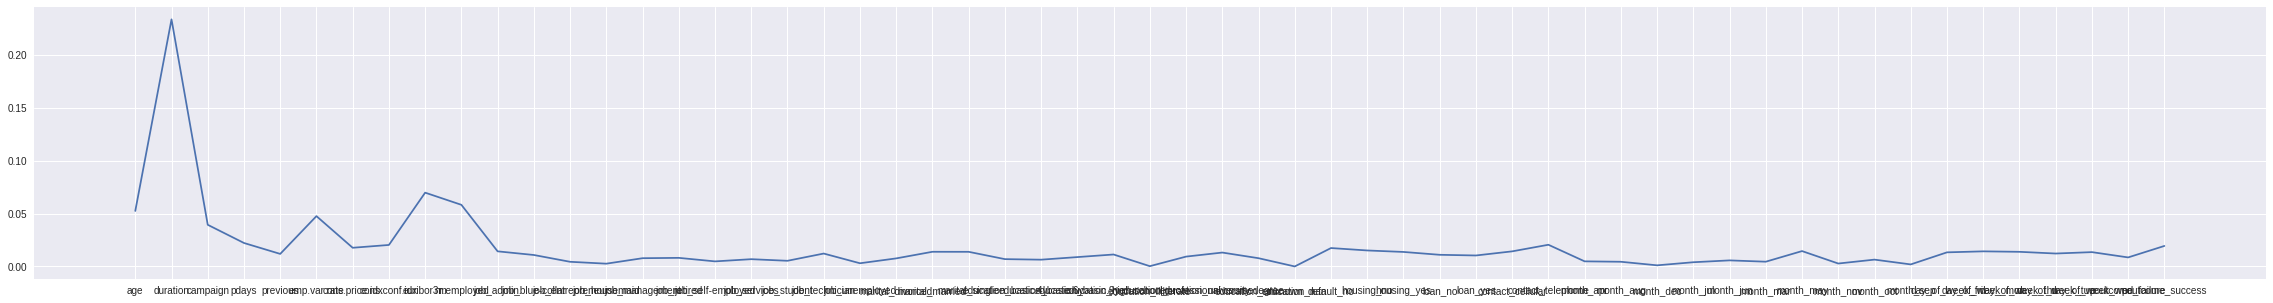

In [284]:
plt.figure(figsize=(40,5))
plt.plot(cols, l)

In [262]:
imp_features = []
for i in range(len(l)):
  if(l[i] > avg):
    imp_features.append(cols[i])
print(imp_features)
print(len(imp_features))

['age', 'duration', 'campaign', 'pdays', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'contact_telephone', 'poutcome_success']
11


In [0]:
train_imp = df_new[[c for c in df_new if c  in imp_features ]]

In [268]:
#train_imp['y'] = df_new['y']
train_imp.columns

Index(['age', 'duration', 'campaign', 'pdays', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed',
       'contact_telephone', 'poutcome_success', 'y'],
      dtype='object')

In [0]:
X_train, X_test, y_train, y_test = train_test_split(train, test, test_size=0.3, random_state=2, stratify=test)
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

scale.fit_transform(X_train)
scale.fit_transform(X_test)
scale.fit_transform(y_train)
scale.fit_transform(y_test)

In [286]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred))

0.87


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [287]:
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test,predictions))

[[1016  184]
 [ 106 1094]]
              precision    recall  f1-score   support

           0       0.91      0.85      0.88      1200
           1       0.86      0.91      0.88      1200

   micro avg       0.88      0.88      0.88      2400
   macro avg       0.88      0.88      0.88      2400
weighted avg       0.88      0.88      0.88      2400



In [298]:
clf = RandomForestClassifier(n_estimators=500)
clf.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [299]:
predictions = clf.predict(X_test)
print(metrics.accuracy_score(y_test1, predictions))

0.8791666666666667


In [300]:
print(confusion_matrix(y_test, predictions))

print(classification_report(y_test,predictions))

[[1022  178]
 [ 112 1088]]
              precision    recall  f1-score   support

           0       0.90      0.85      0.88      1200
           1       0.86      0.91      0.88      1200

   micro avg       0.88      0.88      0.88      2400
   macro avg       0.88      0.88      0.88      2400
weighted avg       0.88      0.88      0.88      2400



In [291]:
for i in range(len(l)):
    if(l[i] > avg):
      print(str(cols[i])+" - "+str(l[i]))

age - 0.05245819586538504
duration - 0.2335464651561264
campaign - 0.0393660255791521
pdays - 0.02217292714841749
emp.var.rate - 0.04755933951729914
cons.price.idx - 0.017657948587546806
cons.conf.idx - 0.020310643596669165
euribor3m - 0.06974952220731095
nr.employed - 0.058242579753768654
contact_telephone - 0.02050009817908126
poutcome_success - 0.019373072267357464


The above features have above average importance in predicting the target, ExtraReesClassiffier was used to obtain importance

In [0]:
from sklearn.tree import export_graphviz
estimator = clf.estimators_[5]

In [303]:
from sklearn.datasets import load_iris
from graphviz import Source
from sklearn import tree
Source( tree.export_graphviz(estimator, out_file=None, feature_names=X_train.columns))

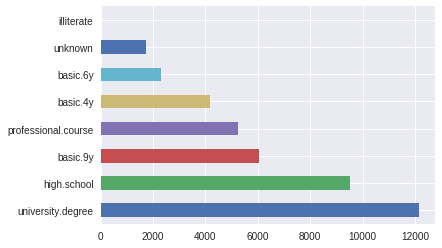

In [306]:
df['education'].unique()
df['education'].value_counts().plot(kind="barh") # plots on intial dataset with 41,000 samples

Customers with university degree are more likely to say 'yes'

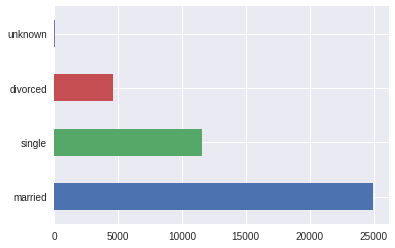

In [322]:
df['marital'].unique()
df['marital'].value_counts().plot(kind="barh") # plots on intial dataset with 41,000 samples

Married people have higher chance of giving a positive outcome

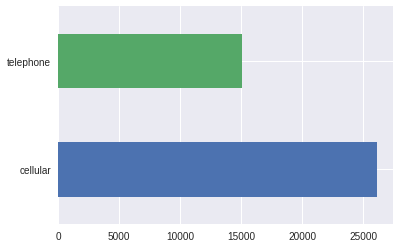

In [328]:
#df['contact'].unique()
df['contact'].value_counts().plot(kind="barh") # plots on intial dataset with 41,000 samples

Contact made on cellular phones has higher chance of positive outcome

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:482: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data[hue_mask])


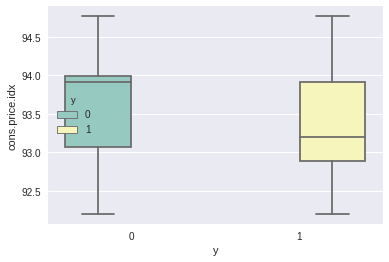

In [327]:
ax = sns.boxplot(x="y", y="cons.price.idx",hue="y", data=df, palette="Set3") # box plot to identify features which give positive outcome